<a href="https://colab.research.google.com/github/MariaSabrinaMa/pytorchTutorial/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear hiring manager at Saluda Medical,

I appreciate the time and effort you spent on reviewing my application. Below is my analysis for the problem. The code used to conduct the analysis is submitted in a separate file named "saluda_code.py". Please feel free to let me know if you have any questions.

Kind regards,

Maria

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

Load dataset with pandas.

In [32]:
raw_data = pd.read_csv("Research_eng_dataset.csv")
t = raw_data["Time (ms)"]
traces = raw_data.iloc[:, 1:]

The effect of system noise was examined by plotting the 10 traces when no stimulating current is present (i.e., current value of 0.0 mA) . It can be seen from the plot below that the resting voltage is around 0 with a noise of zero mean and variations in both positive and negative domains. This indicates a time-invariant and symmetric bell-shaped noise distribution.

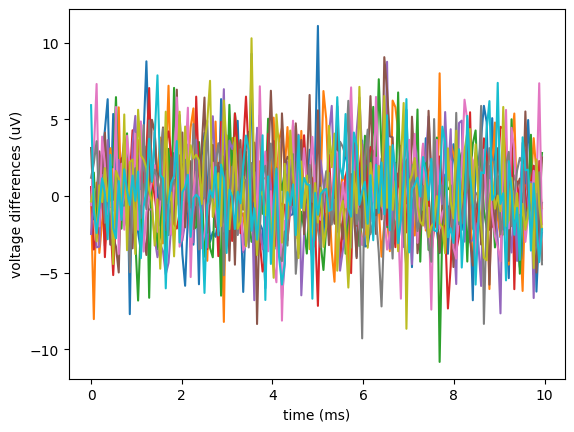

In [36]:
traces_0mA = traces.iloc[:, 0:10]
plt.plot(t, traces_0mA)
plt.xlabel("time (ms)")
plt.ylabel("voltage differences (uV)")
plt.show()

# **How many signals are present?**

Two signals are present.

When the stimulating current is higher than a certain threshold, one group of fibre is activated first with a peak indicating that depolarization and repolarization had occured. As the current continues to grow, another larger group of fiber also gets activated, hence a second signal occurs later on.

Here ***find_peaks*** and ***savgol_filter*** functions from ***scipy*** library were used for peak identification and noise smoothing. The number of peaks (signals) identified for each trace is demonstrated in the table below. The *window_length* of 15 and *polyorder* of 2 in ***savgol_filter*** were chosen to preseve the local trend of the original signal. A *prominence* of 10 in ***find_peaks*** was used to remove irrelavant peaks from noise.

In [35]:
results = {}
for trace_col in traces:
    trace_data = traces[trace_col]
    trace_data_filtered = savgol_filter(trace_data, window_length=15, polyorder=2)
    peaks, _ = find_peaks(trace_data_filtered, prominence=10)
    results[trace_col] = len(peaks)

results_df = pd.DataFrame(list(results.items()), columns=['Trace', 'Number of peaks'])
print(results_df)

       Trace  Number of peaks
0    0.0mA_0                0
1    0.0mA_1                0
2    0.0mA_2                0
3    0.0mA_3                0
4    0.0mA_4                0
..       ...              ...
995  9.9mA_5                2
996  9.9mA_6                2
997  9.9mA_7                2
998  9.9mA_8                2
999  9.9mA_9                2

[1000 rows x 2 columns]


Alternatively, assuming the same system noise characteristic as discussed above, simply taking the mean value of all 10 traces for each current value can also be effective in mitigating the random noise.

In [37]:
traces_values = traces.values
reshaped_arr = traces_values.reshape(164, 100, -1)
traces_mean = reshaped_arr.mean(axis=2)

results = {}
for trace_col in range(traces_mean.shape[1]):
    trace_data = traces_mean[:, trace_col]
    peaks, _ = find_peaks(trace_data, prominence=10)
    results[trace_col] = len(peaks)

results_df = pd.DataFrame(list(results.items()), columns=['Trace index', 'Number of peaks'])
print(results_df)

    Trace index  Number of peaks
0             0                0
1             1                0
2             2                0
3             3                0
4             4                0
..          ...              ...
95           95                2
96           96                2
97           97                2
98           98                2
99           99                2

[100 rows x 2 columns]


# **What is their morphology?**

1. When there is only one signal present, the amplitude of the signal ranges from approximately 0 to 20 uV. The peak occurs at around 39 ms and the signal lasts for around 10 ms (please see plot exampled with 3.5 mA below).


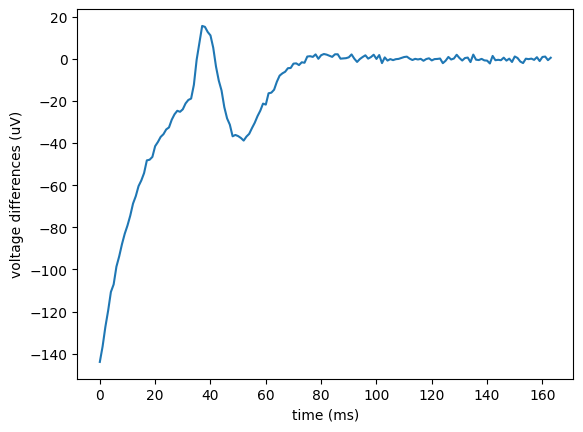

In [38]:
reshaped_traces = traces_mean.reshape(-1, order='F')
plt.plot(range(164), reshaped_traces[164 * 35:164 * 36])
plt.xlabel("time (ms)")
plt.ylabel("voltage differences (uV)")
plt.show()

2. When there are two signals present, the amplitude of the second signal ranges from approximately 5 to 50 uV. The signal is biphasic with the second peak occurs around 63 ms and the signal lasts for around 25 ms (please see plot exampled with 9.5 mA below).

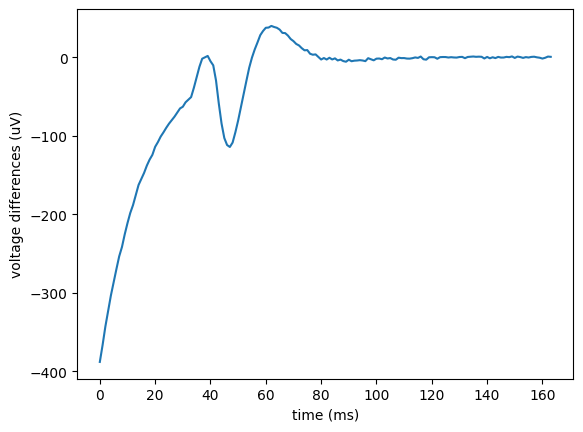

In [39]:
plt.plot(range(164), reshaped_traces[164 * 95:164 * 96])
plt.xlabel("time (ms)")
plt.ylabel("voltage differences (uV)")
plt.show()

# **What is their threshold (i.e. the stimulating current above which a signal is present)?**

The threshold current is between 2.3 to 2.4 mA.
With a stimuting current of 2.3 mA, signals were identified in some but not all 10 traces, which can be explained by the presence of random noise. In constrast, no signal was identified when using the average of all 10 traces until the current has increased to 2.4 mA. This leads to the conclusion that the threshold sits between 2.3 mA and 2.4 mA.

# **Can you plot a growth curve for each signal, i.e. its amplitude as a function of the stimulating current?**

The growth curve for the peak amplitude of both signal 1 and 2 were plotted below with signal 1 at the top and signal 2 at the bottom. For signal 1, a rapid increase to 20 uV was observed when the stimulating current exceeded the threhold value. Its peak amplitude then gradually decreased to the resting voltage of 0 uV. For signal 2, the peak amplitude appeared and increased monotonically when the stimulating current was around 8.5 mA.


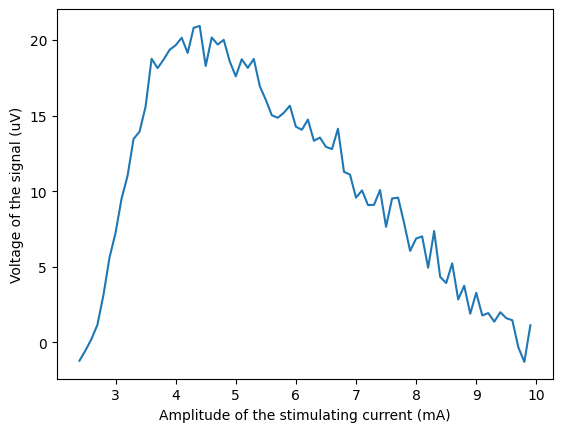

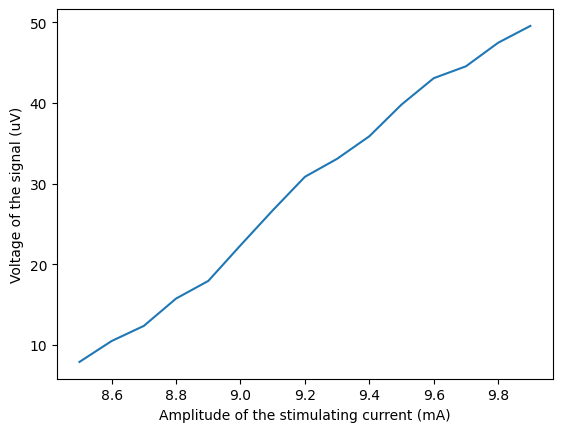

In [40]:
peaks_signal1 = np.zeros(100)
peaks_signal2 = np.zeros(100)
current_amplitude = np.arange(0.0, 10.0, 0.1)
for trace_col in range(traces_mean.shape[1]):
    trace_data = traces_mean[:, trace_col]
    peaks, _ = find_peaks(trace_data, prominence=10)
    if len(peaks) == 1:
        peaks_signal1[trace_col] = trace_data[peaks[0]]
    elif len(peaks) == 2:
        peaks_signal1[trace_col] = trace_data[peaks[0]]
        peaks_signal2[trace_col] = trace_data[peaks[1]]

plt.plot(current_amplitude[peaks_signal1 != 0], peaks_signal1[peaks_signal1 != 0])
plt.xlabel("stimulating current amplitude (mA)")
plt.ylabel("voltage differences (uV)")
plt.show()

plt.plot(current_amplitude[peaks_signal2 != 0], peaks_signal2[peaks_signal2 != 0])
plt.xlabel("stimulating current amplitude (mA)")
plt.ylabel("voltage differences (uV)")
plt.show()